In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
input_data = pd.read_csv("deepsolar_tract.csv", encoding="latin-1")

In [3]:
input_data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
input_data.dropna()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,336,157,4548,26,3569,0.3490,200,448,98,1720,2527,10,51,0,147.731200,26999.0,6577,44.520050,85,1911,28,19,16,0,6,88,6420,mn,154.371900,136,6.640769,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,0.002858,0

In [5]:
state_solar_panel_data = input_data[['state','solar_system_count']].groupby('state')

In [6]:
avg_panel_area = input_data.groupby('state').mean()['total_panel_area']

In [7]:
state_solar_panel_data.count().join(avg_panel_area)

,solar_system_count,total_panel_area
state,,
al,1181,192.759931
ar,686,225.293538
az,1526,4538.558226
ca,8056,4558.411967
co,1249,1508.269378
ct,833,1553.147443
dc,179,863.135075
de,218,2283.592023
fl,4245,1455.049485


### highest solar panel count/area in each of Ohio's counties

In [8]:
ohioDF = input_data[input_data['state']=='oh']
ohioDF.groupby('county').max()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams County,26.0,7.0,3858.372945,39001770600,52914.384749,260,1112,26,1812,1038,177,4417,63,2693,0.4813,267,1254,145,85

### The highest solar panels count in all of the Ohio state area

In [9]:
ohioDF[ohioDF['tile_count']==ohioDF['tile_count'].max()]

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
51028,194.0,14.0,22484.710194,39107967400,47635.929648,Mercer County,179,851,0,1696,463,50,3239,0,2375,0.3718,8,434,0,1548,1990,0,0,0,9.094995,19963.0,4772,524.6842,129,1318,0,46,9,21,36,164,4496,oh,9.12201,307,0.027015,0.142945,0.523618,0.262735,0.055264,0.015437,0.0,0.0,0.942163,0.009

In [10]:
ohioDF[['county','tile_count','solar_system_count','total_panel_area','average_household_income']].groupby('county').mean()

,tile_count,solar_system_count,total_panel_area,average_household_income
county,,,,
Adams County,5.000000,1.833333,691.400783,46693.061593
Allen County,5.181818,3.909091,268.003972,54231.203400
Ashland County,2.363636,1.181818,123.444224,56973.955518
Ashtabula County,0.653846,0.538462,35.759022,49926.328473
Athens County,6.600000,4.133333,338.320686,45381.710150
...,...,...,...,...
Washington County,1.750000,1.437500,62.961750,57412.564095
Wayne County,2.250000,1.500000,140.881920,62697.104077
Williams County,2.666667,2.222222,117.864767,54446.516893


In [11]:
ohioDF[['county','tile_count','average_household_income']].groupby('county').mean().corr()

,tile_count,average_household_income
tile_count,1.000000,0.157878
average_household_income,0.157878,1.000000


### Correlation between average household income and number of solar panels

In [12]:
ohioDF[['tile_count','average_household_income']].corr()

,tile_count,average_household_income
tile_count,1.000000,0.081144
average_household_income,0.081144,1.000000


In [13]:
ohioDF[['county','tile_count','total_panel_area','race_asian','race_black_africa','race_indian_alaska','race_white']].groupby('county').sum()

,tile_count,total_panel_area,race_asian,race_black_africa,race_indian_alaska,race_white
county,,,,,,
Adams County,30.0,4148.404700,31,108,64,27503
Allen County,171.0,8844.131080,791,12685,297,87886
Ashland County,26.0,1357.886462,286,445,35,51560
Ashtabula County,17.0,929.734575,471,3399,125,93048
Athens County,99.0,5074.810289,2168,1513,330,59154
...,...,...,...,...,...,...
Washington County,28.0,1007.388007,415,683,100,59048
Wayne County,72.0,4508.221440,935,1944,217,110015
Williams County,24.0,1060.782903,132,447,99,35756


### Correlation between race and solar panels

In [14]:
ohioDF[['county','tile_count','total_panel_area','race_asian','race_black_africa','race_indian_alaska','race_white']].corr()

,tile_count,total_panel_area,race_asian,race_black_africa,race_indian_alaska,race_white
tile_count,1.000000,0.936347,0.112003,-0.025616,0.033178,0.125249
total_panel_area,0.936347,1.000000,0.074827,-0.015450,0.023246,0.064357
race_asian,0.112003,0.074827,1.000000,0.015091,0.069964,0.272381
race_black_africa,-0.025616,-0.015450,0.015091,1.000000,0.044732,-0.414467
race_indian_alaska,0.033178,0.023246,0.069964,0.044732,1.000000,0.041967
race_white,0.125249,0.064357,0.272381,-0.414467,0.041967,1.000000


In [15]:
ohioDF[['county','tile_count_residential','tile_count_nonresidential','average_household_income']].groupby('county').mean()

,tile_count_residential,tile_count_nonresidential,average_household_income
county,,,
Adams County,0.500000,4.500000,46693.061593
Allen County,3.000000,2.181818,54231.203400
Ashland County,1.000000,1.363636,56973.955518
Ashtabula County,0.346154,0.307692,49926.328473
Athens County,4.066667,2.533333,45381.710150
...,...,...,...
Washington County,1.062500,0.687500,57412.564095
Wayne County,1.156250,1.093750,62697.104077
Williams County,1.888889,0.777778,54446.516893


In [16]:
X = ohioDF[['county','tile_count', 'average_household_income']].groupby('county').mean()

In [17]:
X

,tile_count,average_household_income
county,,
Adams County,5.000000,46693.061593
Allen County,5.181818,54231.203400
Ashland County,2.363636,56973.955518
Ashtabula County,0.653846,49926.328473
Athens County,6.600000,45381.710150
...,...,...
Washington County,1.750000,57412.564095
Wayne County,2.250000,62697.104077
Williams County,2.666667,54446.516893


Text(0, 0.5, 'Tile Count')

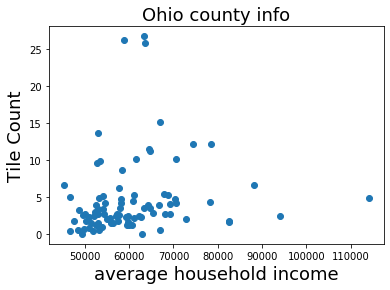

In [18]:
plt.scatter(X['average_household_income'], X['tile_count'], cmap="gist_rainbow")
plt.title('Ohio county info', fontsize=18)
plt.xlabel('average household income', fontsize=18)
plt.ylabel('Tile Count', fontsize=18)

## kmeans clustering

In [19]:
ohioDF

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
7987,1.0,1.0,18.346107,39061003200,42436.797753,Hamilton County,158,80,53,87,105,103,733,147,869,0.5832,0,398,0,296,712,10,8,0,0.314888,20787.0,1563,4963.67700,34,162,306,442,0,0,56,38,721,oh,0.314888,38,0.000000,0.143247,0.118690,0.109141,0.215553,0.140518,0.200546,0.072306,0.461292,0.

In [20]:
laDF = input_data[input_data['state']=='la'][['state','county','tile_count','average_household_income']].groupby(['state','county'], as_index=False).mean()

In [22]:
ohioDF = input_data[input_data['state']=='oh'][['county','tile_count', 'average_household_income', 'state']].groupby(['state','county'], as_index=False).mean()

In [23]:
appended_df = ohioDF.append(laDF)

In [25]:
label_encoder = preprocessing.LabelEncoder()

In [26]:
appended_df['state'] = label_encoder.fit_transform(appended_df['state'])

In [27]:
appended_df

,state,county,tile_count,average_household_income
0,1,Adams County,5.000000,46693.061593
1,1,Allen County,5.181818,54231.203400
2,1,Ashland County,2.363636,56973.955518
3,1,Ashtabula County,0.653846,49926.328473
4,1,Athens County,6.600000,45381.710150
...,...,...,...,...
59,0,Webster Parish,3.363636,49064.612453
60,0,West Baton Rouge Parish,164.800000,66955.186695
61,0,West Carroll Parish,1.666667,50591.570149
62,0,West Feliciana Parish,1.666667,71451.932820


In [28]:
X = appended_df[['tile_count','average_household_income']]

In [29]:
X = X.to_numpy()

In [30]:
X

array([[5.00000000e+00, 4.66930616e+04],
       [5.18181818e+00, 5.42312034e+04],
       [2.36363636e+00, 5.69739555e+04],
       [6.53846154e-01, 4.99263285e+04],
       [6.60000000e+00, 4.53817101e+04],
       [1.11818182e+01, 6.48251162e+04],
       [9.50000000e-01, 5.38367969e+04],
       [1.44444444e+00, 5.64878676e+04],
       [4.73750000e+00, 7.04423271e+04],
       [1.14285714e+00, 5.94981137e+04],
       [4.40000000e+00, 6.09110756e+04],
       [4.18181818e+00, 5.45547774e+04],
       [4.27500000e+00, 7.82664780e+04],
       [4.66666667e+00, 5.82928587e+04],
       [1.50000000e+00, 5.59269680e+04],
       [1.50000000e+00, 5.15401200e+04],
       [3.84615385e+00, 5.25607131e+04],
       [2.42729306e+00, 5.98654304e+04],
       [6.25000000e+00, 5.77426138e+04],
       [2.33333333e+00, 5.96394694e+04],
       [4.82857143e+00, 1.13991676e+05],
       [3.47368421e+00, 6.47379456e+04],
       [2.07142857e+00, 7.29308553e+04],
       [9.85714286e+00, 5.35295010e+04],
       [3.940140

In [31]:
y = np.array(appended_df['state'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
kmeans = KMeans(n_clusters=2, random_state=21)

In [33]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [34]:
centers = kmeans.cluster_centers_
print(centers)

[[1.86516236e+01 7.12234994e+04]
 [7.72257369e+00 5.37469188e+04]]


In [35]:
new_labels = kmeans.labels_
new_labels

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int32)

Text(0, 0.5, 'Tile count')

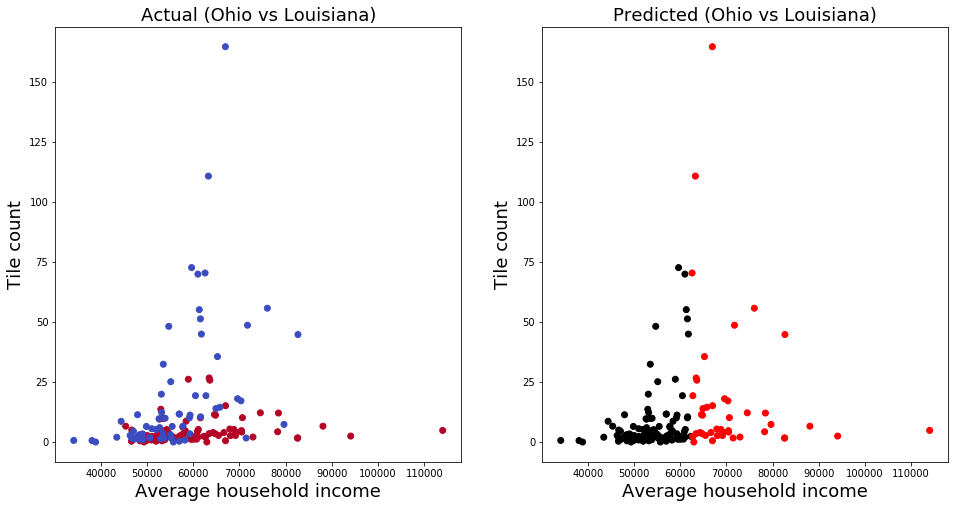

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:,1], X[:,0], c=y, cmap="coolwarm")
axes[0].set_title("Actual (Ohio vs Louisiana)", fontsize=18)
axes[0].set_xlabel("Average household income", fontsize=18)
axes[0].set_ylabel("Tile count", fontsize=18)
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="flag")
axes[1].set_title("Predicted (Ohio vs Louisiana)", fontsize=18)
axes[1].set_xlabel("Average household income", fontsize=18)
axes[1].set_ylabel("Tile count", fontsize=18)